In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cudaviz.mandelbrot import mandelbrot
from cudaviz.diffusion import naiive_diffusion
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML, display

In [2]:
colors = ['#76b900', '#000000']
cmap = LinearSegmentedColormap.from_list("nvidia_green_to_black", colors)

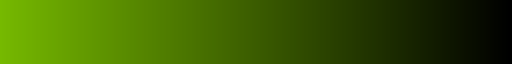

In [3]:
cmap

In [7]:
N=10000
max_iter=200
# x_center = -0.75
# y_center = 0.0
x_center = -0.7
y_center = 0.35
zoom = 0.001

grid = mandelbrot(N=N, max_iter=max_iter, x_center=x_center, y_center=y_center, zoom=zoom)

[]

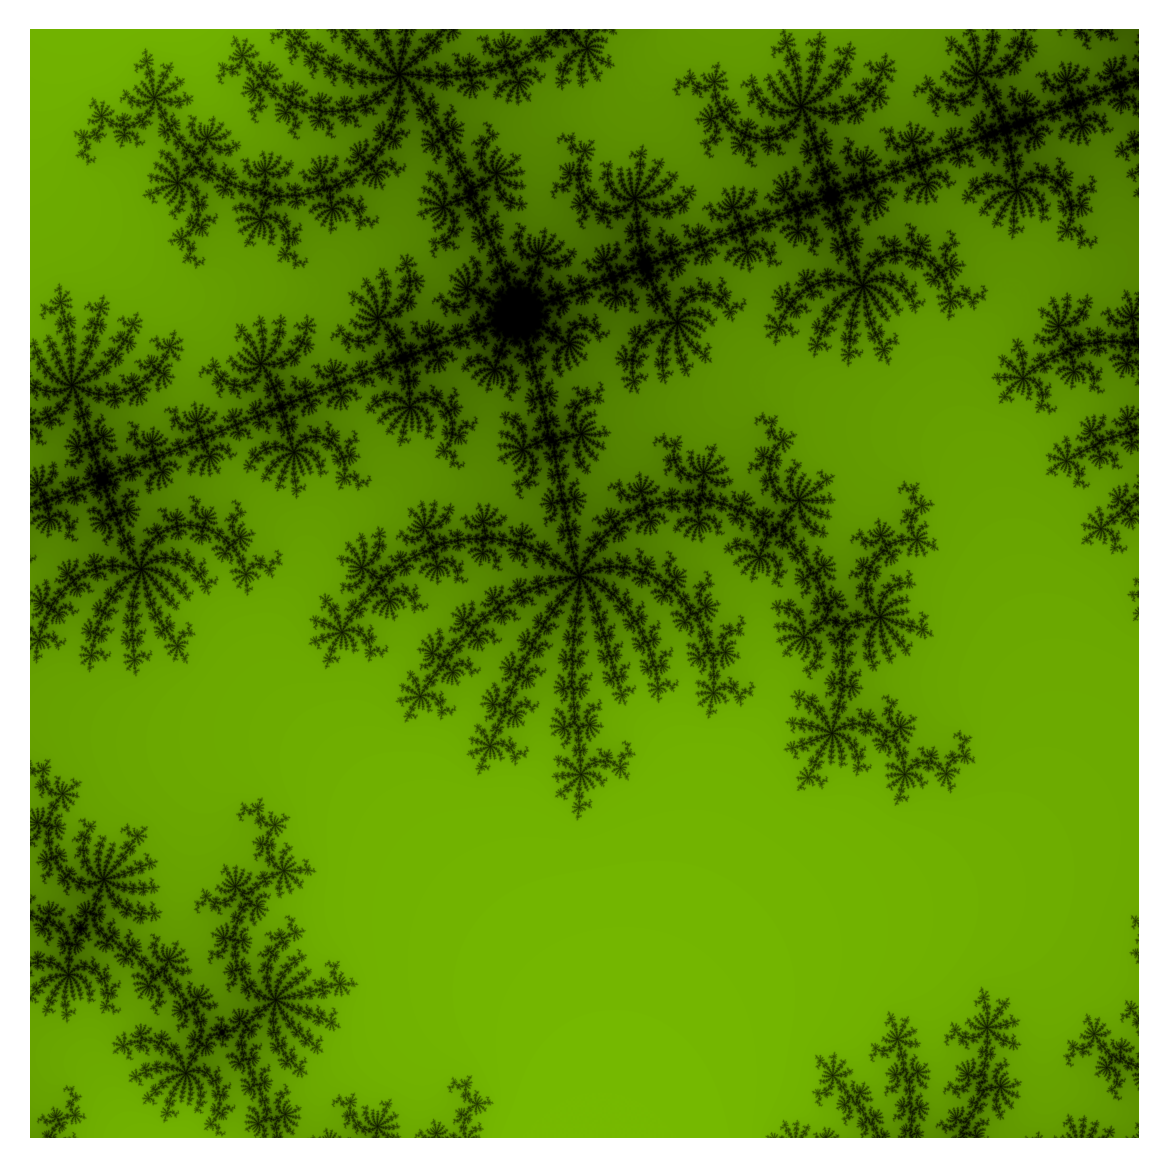

In [5]:
fig, ax = plt.subplots(dpi=300)

ax.imshow(grid, cmap=cmap)
ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([]);

In [4]:
data = np.array(naiive_diffusion(nx=10, ny=10, nt=10, central_temperature = 10, spread=20, d = 1))

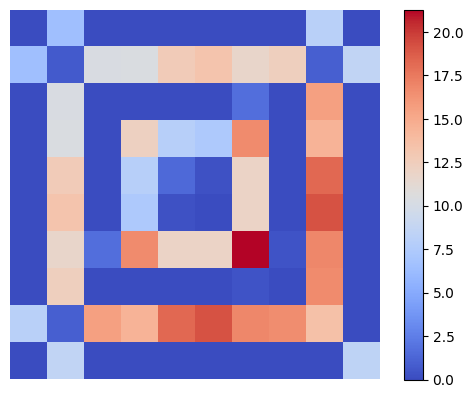

In [5]:
fig, ax = plt.subplots()

ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([])

im = ax.imshow(data[5], cmap='coolwarm');
cbar = ax.figure.colorbar(im)

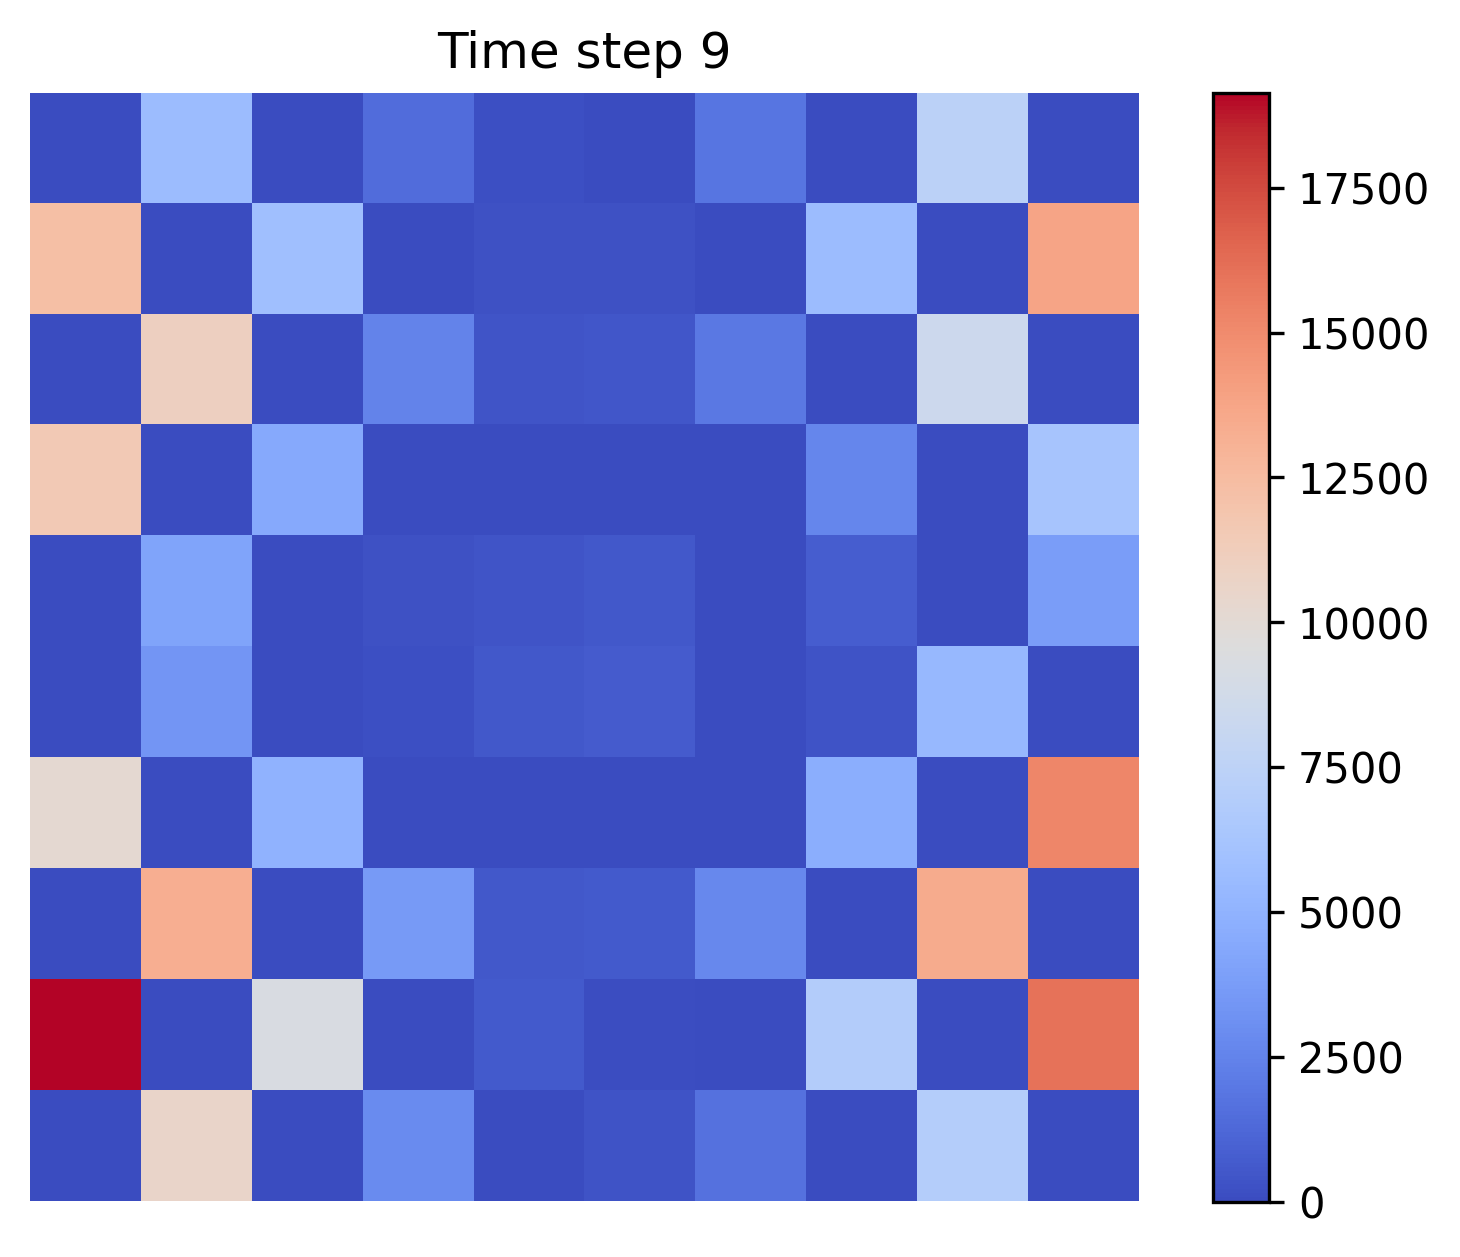

In [5]:
fig, ax = plt.subplots(dpi=300)

ax.spines[:].set_visible(False)
ax.tick_params(width=0)
ax.set_xticks([])
ax.set_yticks([])

im = ax.imshow(data[0], cmap='coolwarm', interpolation='nearest', vmin=np.min(data), vmax=np.max(data));
cbar = ax.figure.colorbar(im)

def update(frame):
    im.set_array(data[frame])
    ax.set_title(f"Time step {frame}")
    return [im]

ani = animation.FuncAnimation(fig, update, frames=data.shape[0], interval=100, blit=True);
display(HTML(ani.to_jshtml()))